Prepare and modify figures for paper.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Data distribution
Adopted from build_models_07.ipynb.

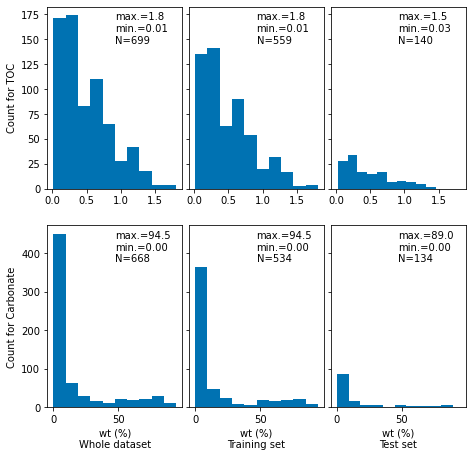

In [17]:
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
ca_df = merge_df[merge_df.core != 'SO178-12-3'] # This core doesn't have CaCO3 measurement

toc_y_train, toc_y_test = train_test_split(merge_df['TOC%'].values, test_size = 0.2, shuffle = True, random_state = 24)
ca_y_train, ca_y_test = train_test_split(ca_df['CaCO3%'].values, test_size = 0.2, shuffle = True, random_state = 24)


    #ax.set_xlabel('wt (%)\n{}'.format(label))
    
for ax, y, label in zip(axes[0, :], [merge_df['TOC%'], toc_y_train, toc_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    
for ax, y, label in zip(axes[1, :], [ca_df['CaCO3%'], ca_y_train, ca_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))

axes[0, 0].set_ylabel('Count for TOC')
axes[1, 0].set_ylabel('Count for Carbonate')


fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_{}.png'.format(date))

In [19]:
np.unique(merge_df.core)

array(['LV28-44-3', 'LV29-114-3', 'SO178-12-3', 'SO264-13-2',
       'SO264-15-2', 'SO264-28-2', 'SO264-55-1', 'SO264-56-2',
       'SO264-64-1', 'SO264-66-2'], dtype=object)

In [18]:
merge_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815.0
